<a href="https://colab.research.google.com/github/ShireenParveen/Stock_Prediction/blob/main/Tesla_Stock_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,30-06-2010,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,01-07-2010,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,02-07-2010,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,06-07-2010,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,18-03-2022,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,21-03-2022,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,22-03-2022,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,23-03-2022,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [28]:
df.shape

(2956, 7)

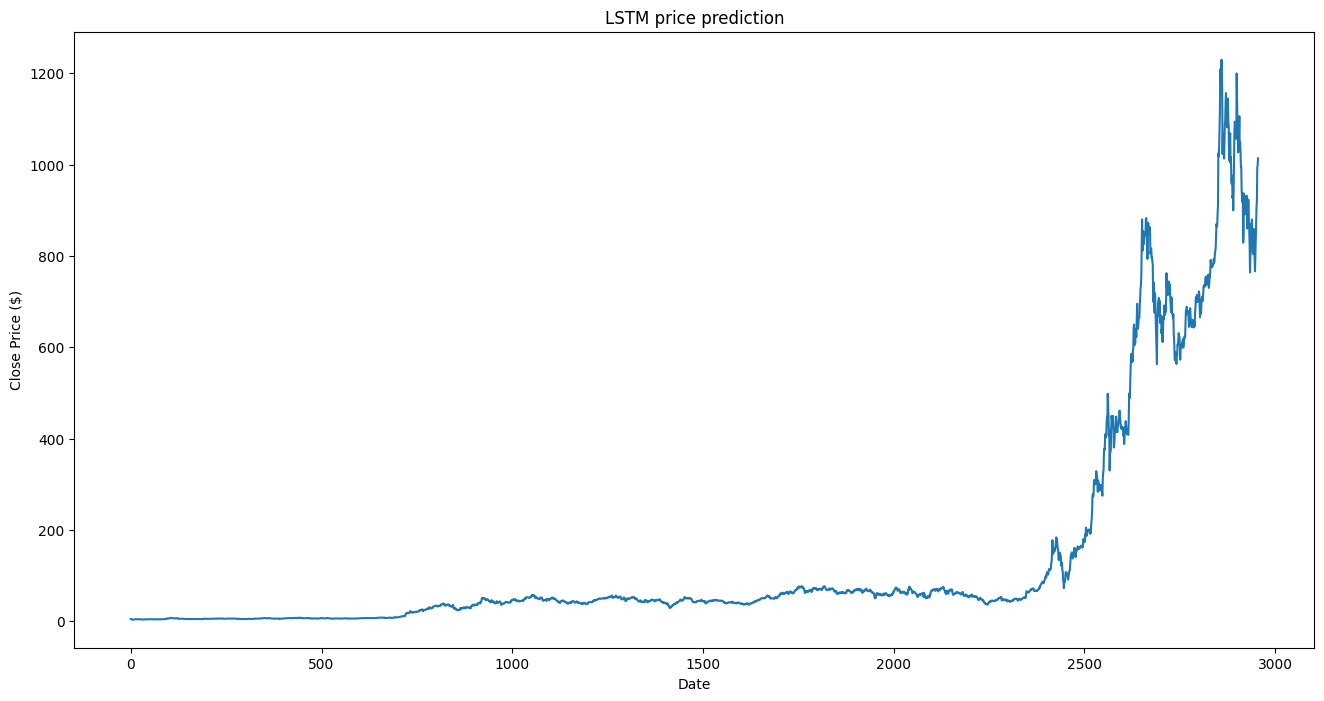

In [29]:
plt.figure(figsize=(16,8))
plt.title('LSTM price prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(df["Close"])
plt.show()

In [30]:
data=df.filter(['Close'])
dataset=data.values

In [31]:
training_data_len =math.ceil(len(dataset)*0.8)
training_data_len


2365

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

In [33]:
train_data=scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<60:
    print(x_train)
    print(y_train)
    print()

In [34]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [35]:
x_train =np.reshape(x_train, newshape= (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(2305, 60, 1)

In [36]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
model.fit(x_train, y_train, epochs=1, batch_size=1)

2305/2305 [==============================] - 99s 41ms/step - loss: 1.7176e-05


In [39]:
test_data=scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [40]:
x_test =np.array(x_test)

In [41]:
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [42]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 2s 19ms/step


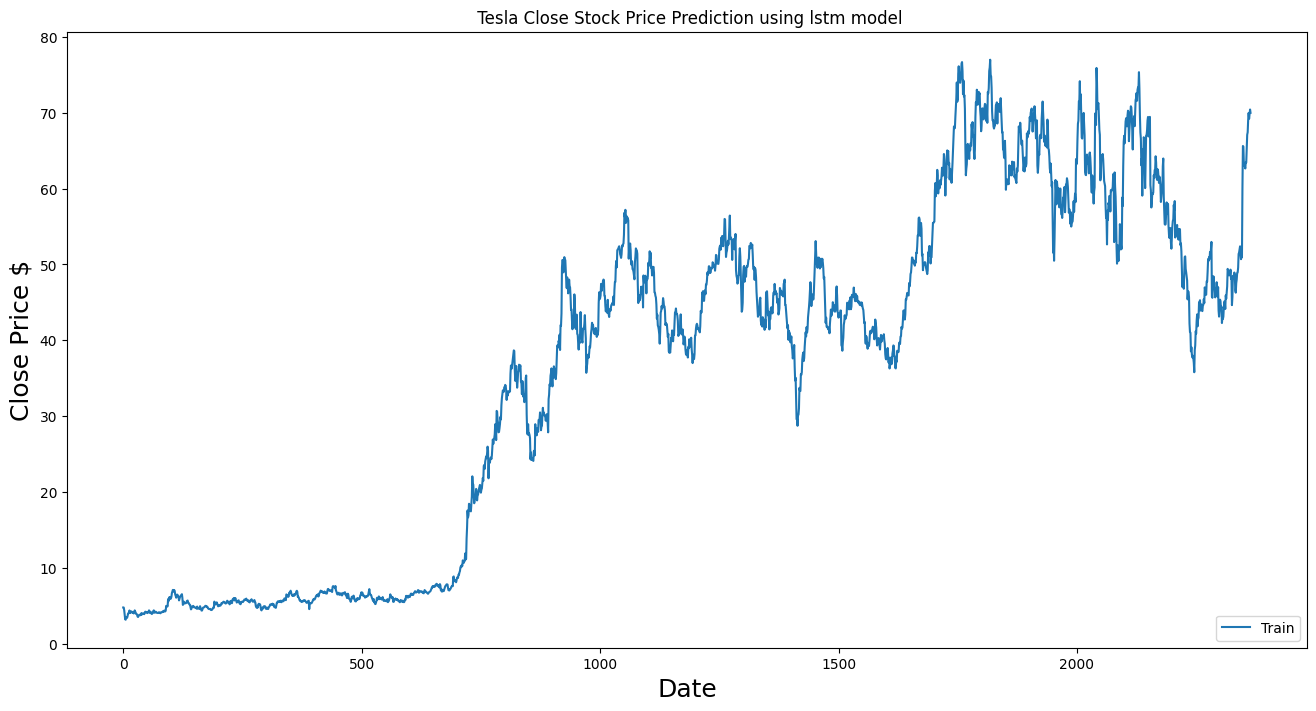

In [43]:
train=data[:training_data_len]
valid=data[training_data_len:]


plt.figure(figsize=(16,8))
plt.title(' Tesla Close Stock Price Prediction using lstm model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train', 'Val', 'Prediction'],loc ='lower right')
plt.show()